In [1]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

In [2]:
Countrydata = pd.read_csv('/Users/balwiiredavis/Desktop/Country-data.csv')

In [3]:
Countrydata.shape

(167, 10)

In [5]:
Countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Checking for null values

Countrydata.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Investigate all the elements whithin each Feature 

for column in Countrydata:
    unique_vals = np.unique(Countrydata[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature country :167
The number of values for feature child_mort :139
The number of values for feature exports :147
The number of values for feature health :147
The number of values for feature imports :151
The number of values for feature income :156
The number of values for feature inflation :156
The number of values for feature life_expec :127
The number of values for feature total_fer :138
The number of values for feature gdpp :157


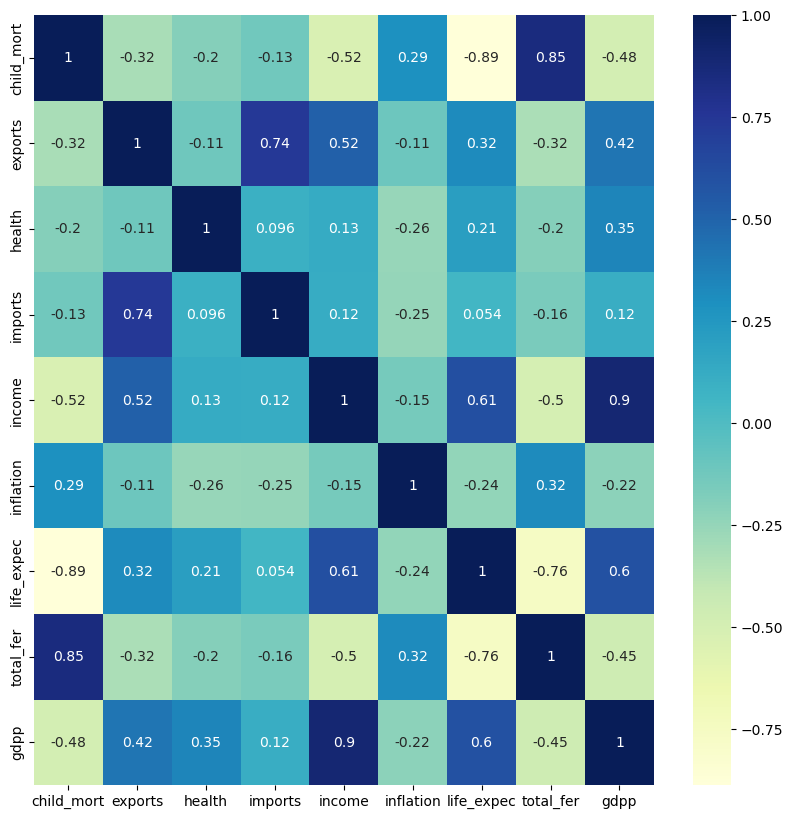

In [8]:
data_without_country = Countrydata.drop(columns=['country'])
plt.figure(figsize=(10, 10))
sns.heatmap(data_without_country.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
# Scaling the data and storing it in a new dataframe
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_without_country), columns=data_without_country.columns)
data_scaled.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [10]:
# Running Kmeans

X_train = data_scaled.values

# We wills start with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [2 0 0 2 0 0 0 1 1 0 0 1 0 0 0 1 0 2 0 0 0 2 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 2 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 0 2 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 1 1 1 0 2 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]
The Inertia is:  831.4244352086874


/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
kmeans.labels_.shape

(167,)

In [12]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

The innertia for : 2 Clusters is: 1050.2145582853304
The innertia for : 3 Clusters is: 831.4244352086874
The innertia for : 4 Clusters is: 700.4309167631569
The innertia for : 5 Clusters is: 631.3877859960571
The innertia for : 6 Clusters is: 550.8929602600836
The innertia for : 7 Clusters is: 495.42769438167204
The innertia for : 8 Clusters is: 450.83556490866266
The innertia for : 9 Clusters is: 422.76238460748846
The innertia for : 10 Clusters is: 399.53198189050437
The innertia for : 11 Clusters is: 374.1088769861633
The innertia for : 12 Clusters is: 352.78587583064336
The innertia for : 13 Clusters is: 337.12792902046453
The innertia for : 14 Clusters is: 322.2247880470199
The innertia for : 15 Clusters is: 304.79480871907
The innertia for : 16 Clusters is: 291.8612137741859
The innertia for : 17 Clusters is: 275.4356951713927
The innertia for : 18 Clusters is: 265.3834124403379
The innertia for : 19 Clusters is: 249.1980925716576


/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

In [13]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

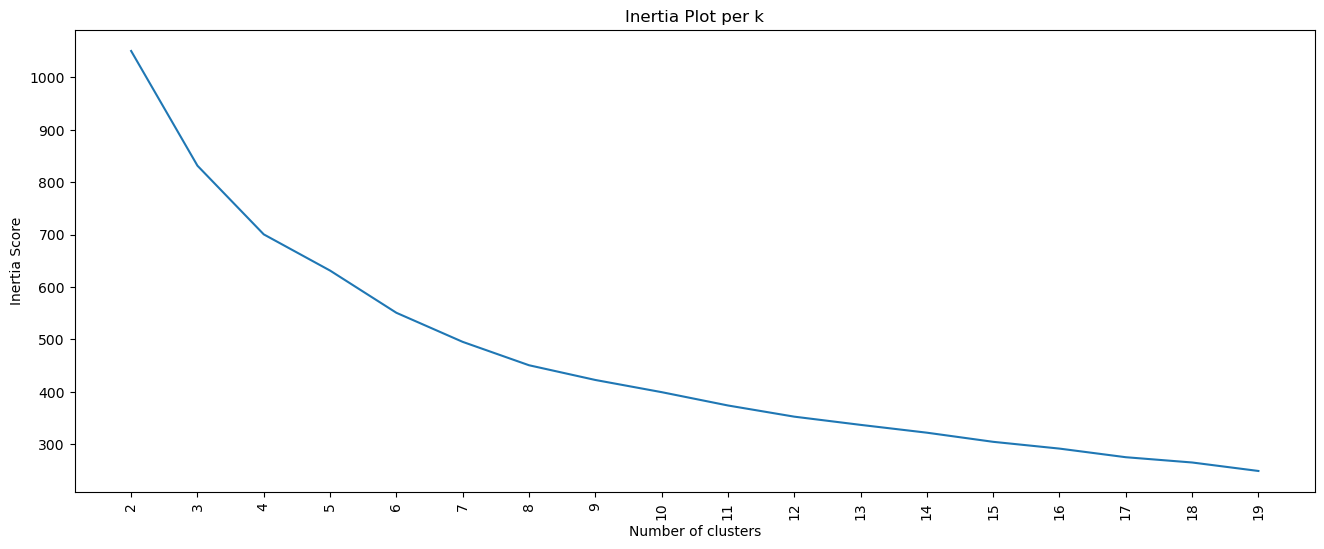

In [14]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [16]:
# Running K means on 3 clusters

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

/Users/balwiiredavis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster 0,Cluster 1,Cluster 2
0,84,36,47


In [17]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [18]:
predictions

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

Explained variance ratio (first two components): [0.4595174  0.17181626]


<Figure size 640x480 with 0 Axes>

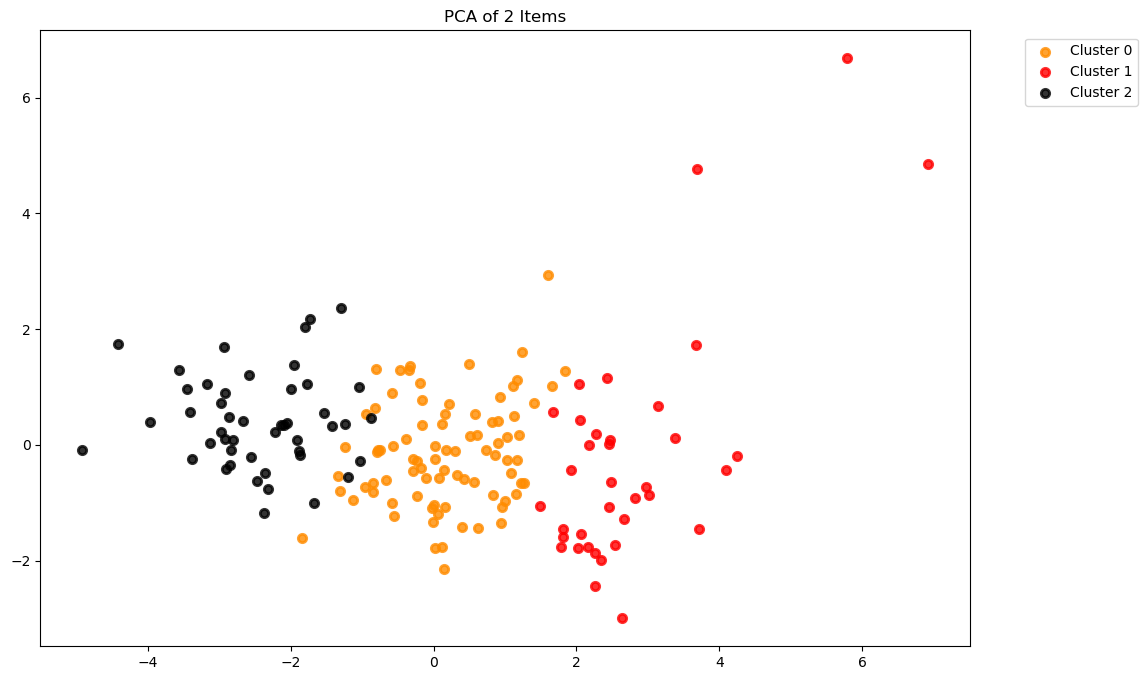

In [19]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  9.054216867469874
The 95% variance we want to have is:  8.60150602409638

Variance explain with 00 n_compononets:  0
Variance explain with 05 n_compononets:  8.559041526462998
Variance explain with 06 n_compononets:  8.783969521563655
Variance explain with 07 n_compononets:  8.89809162327703
Variance explain with 10 n_compononets:  9.054216867469874
Variance explain with 25 n_compononets:  9.054216867469874
Variance explain with 30 n_compononets:  9.054216867469874
Variance explain with 35 n_compononets:  9.054216867469874
Variance explain with 40 n_compononets:  9.054216867469874
Variance explain with 45 n_compononets:  9.054216867469874
Variance explain with 50 n_compononets:  9.054216867469874
Variance explain with 55 n_compononets:  9.054216867469874


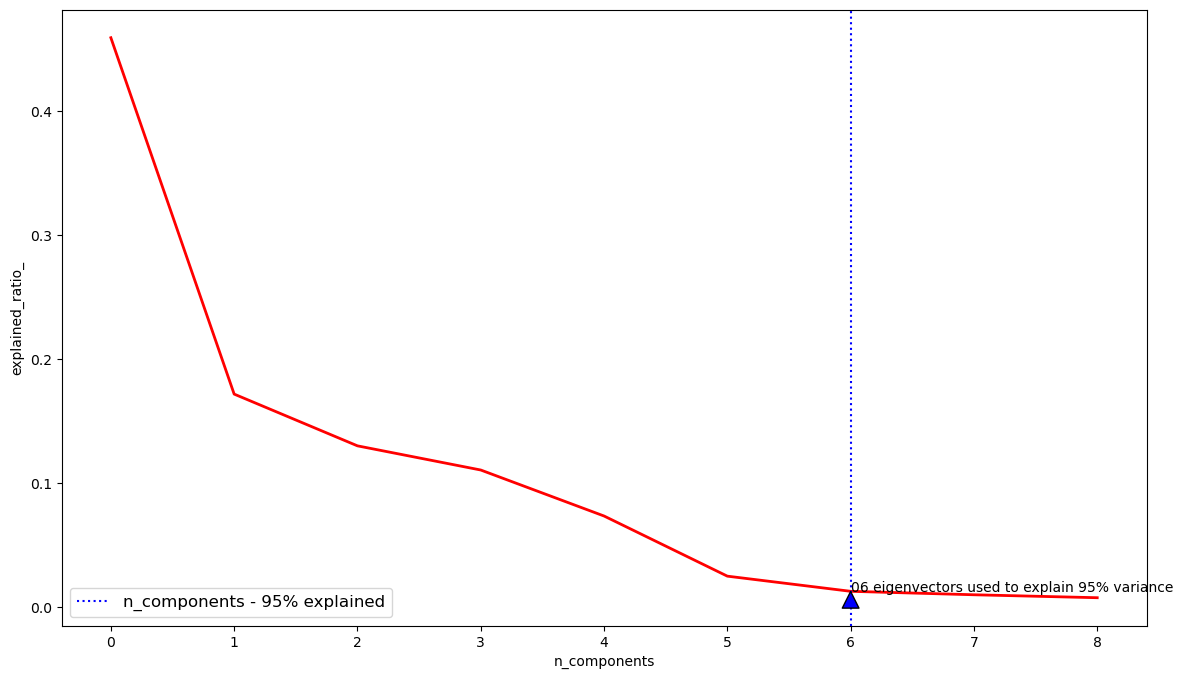

In [21]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 00 n_compononets: ", sum(a["Explained Variance"][0:0]))
print("Variance explain with 05 n_compononets: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 06 n_compononets: ", sum(a["Explained Variance"][0:6]))
print("Variance explain with 07 n_compononets: ", sum(a["Explained Variance"][0:7]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 25 n_compononets: ", sum(a["Explained Variance"][0:25]))
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 45 n_compononets: ", sum(a["Explained Variance"][0:45]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(6, linestyle=':', label='n_components - 95% explained', c="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('06 eigenvectors used to explain 95% variance', xy=(6, pca.explained_variance_ratio_[6]),
             xytext=(6, pca.explained_variance_ratio_[6]),  
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

In [24]:
# Running PCA with 6 PC
pca = PCA(n_components=6, random_state=453)
X_r = pca.fit(X).transform(X)

# Running KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=2, n_init=10)  # Explicitly set n_init
kmeans = kmeans.fit(X_r)

# Get cluster labels
clusters = kmeans.labels_

In [25]:
# Attachine the clusters back to our initial Dataset that has all the data
Countrydata['Clusters'] = clusters


In [26]:
# Creating a cluster Category
Countrydata['Clusters Category'] = 'No Data'

Countrydata.loc[Countrydata['Clusters'] == 0, 'Clusters Category'] = 'Cluster 1'
Countrydata.loc[Countrydata['Clusters'] == 1, 'Clusters Category'] = 'Cluster 2'
Countrydata.loc[Countrydata['Clusters'] == 2, 'Clusters Category'] = 'Cluster 3'

Countrydata.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters,Clusters Category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Cluster 1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Cluster 3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Cluster 3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Cluster 1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Cluster 3


In [28]:
Countrydata.to_csv('Countrydata.csv', index=False)